In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-50-billionaires-list/TOP 50 BILLIONAIRES LIST.csv


In [133]:
df= pd.read_csv('/kaggle/input/top-50-billionaires-list/TOP 50 BILLIONAIRES LIST.csv')

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df.isnull().sum()

RANK                 0
NAME                 0
NET WORTH            0
AGE                  1
SOURCE               0
COUNTRY/TERRITORY    0
dtype: int64

In [3]:
df.head()

,RANK,NAME,NET WORTH,AGE,SOURCE,COUNTRY/TERRITORY
0,1.0,Bernard Arnault & family,$176.6 B,73.0,LVMH,France
1,2.0,Elon Musk,$146.5 B,51.0,"Tesla, SpaceX",United States
2,3.0,Gautam Adani,$116.7 B,60.0,"infrastructure, commodities",India
3,4.0,Jeff Bezos,$108.5 B,58.0,Amazon,United States
4,5.0,Warren Buffett,$106.3 B,92.0,Berkshire Hathaway,United States


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RANK               100 non-null    float64
 1   NAME               100 non-null    object 
 2   NET WORTH          100 non-null    object 
 3   AGE                100 non-null    object 
 4   SOURCE             100 non-null    object 
 5   COUNTRY/TERRITORY  100 non-null    object 
dtypes: float64(1), object(5)
memory usage: 4.8+ KB


**Data cleaning:**

In [230]:
df2['NET WORTH']=df2['NET WORTH'].str.replace('$','')
df2['NET WORTH']=df2['NET WORTH'].str.replace(' B','')
df2['NET WORTH']=df2['NET WORTH'].astype('float')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [134]:
df['NET WORTH']=df['NET WORTH'].str.replace('$','')
df['NET WORTH']=df['NET WORTH'].str.replace(' B','')
df['NET WORTH']=df['NET WORTH'].astype('float')


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [146]:
df['AGE']=df['AGE'].astype('float')

In [141]:
agemean=df['AGE'].mean()
agemean

68.12121212121212

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RANK               100 non-null    float64
 1   NAME               100 non-null    object 
 2   NET WORTH          100 non-null    float64
 3   AGE                99 non-null     float64
 4   SOURCE             100 non-null    object 
 5   COUNTRY/TERRITORY  100 non-null    object 
dtypes: float64(3), object(3)
memory usage: 4.8+ KB


In [142]:
df['AGE']=df['AGE'].fillna('68')

**Top billionairs 2022:**

<AxesSubplot:title={'center':'TOP 7 billionaires by their Net worth'}, xlabel='NAME'>

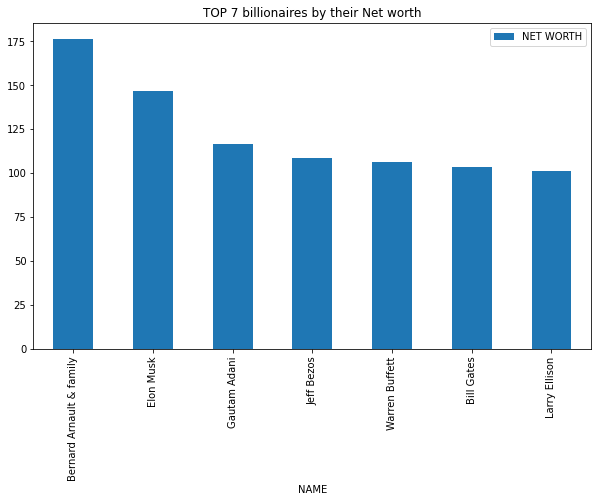

In [224]:
topb=df[['NAME','NET WORTH']].groupby('NAME').sum()
topb=topb.sort_values('NET WORTH',ascending=False)
topb=topb.head(7)
topb.plot(kind='bar',figsize=(10,6),title='TOP 7 billionaires by their Net worth')

**Countries by Total billionairs Net worth:**

array([<AxesSubplot:ylabel='NET WORTH'>], dtype=object)

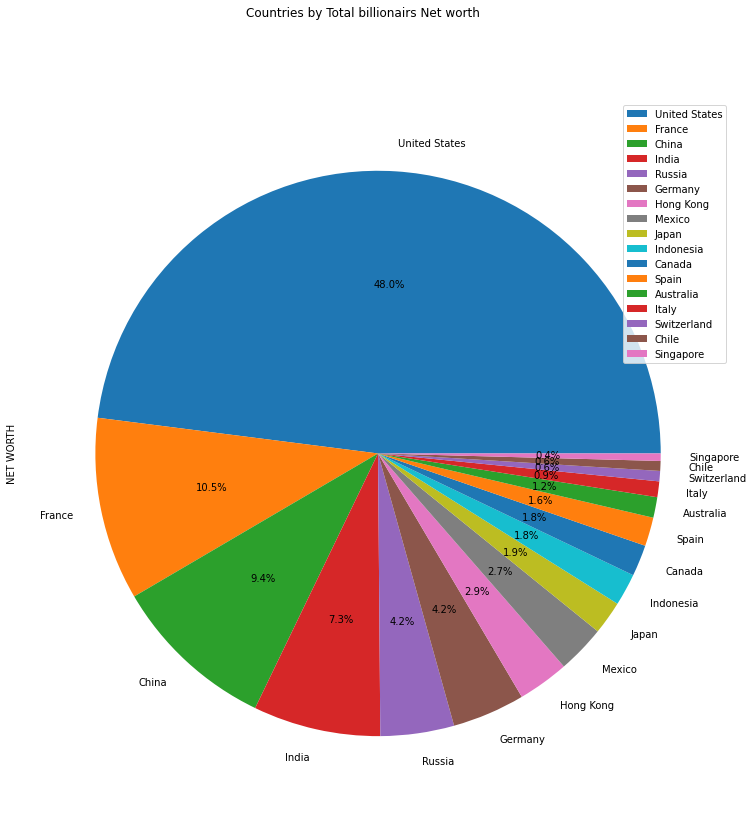

In [231]:
countries=df2[['COUNTRY/TERRITORY','NET WORTH']].groupby('COUNTRY/TERRITORY').sum()
countries=countries.sort_values('NET WORTH',ascending=False)
countries.plot(kind='pie',figsize=(17,13),subplots=True,autopct='%1.1f%%',title='Countries by Total billionairs Net worth')

**Top countries by the total billionairs number**

array([<AxesSubplot:ylabel='NAME'>], dtype=object)

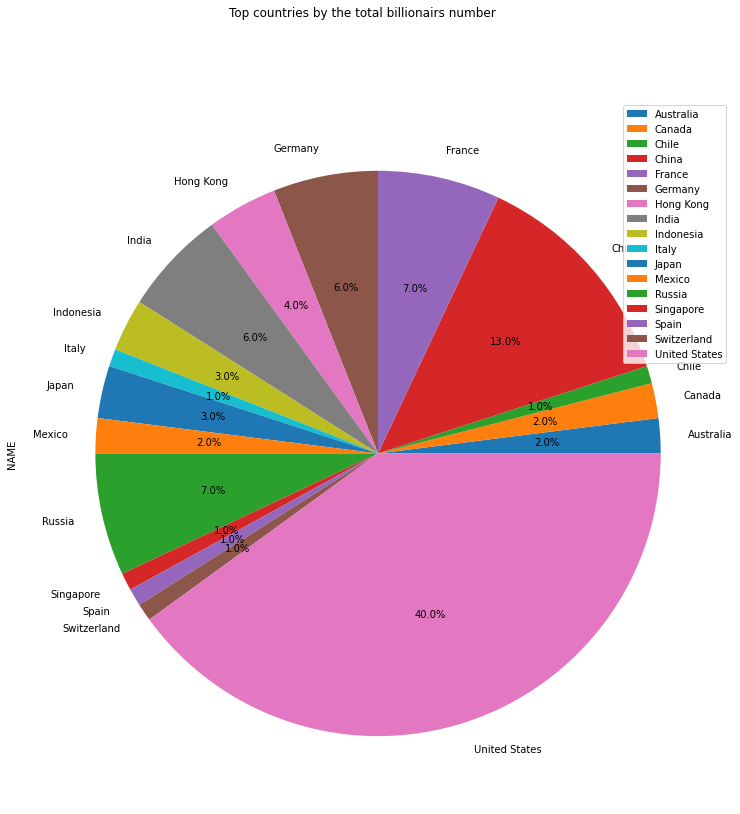

In [238]:
countries2=df2[['COUNTRY/TERRITORY','NAME']].groupby('COUNTRY/TERRITORY').count()
countries2.plot(kind='pie',figsize=(17,13),autopct='%1.1f%%',subplots=True,title='Top countries by the total billionairs number')

**Top 5 Billionairs Income Sources**

<AxesSubplot:title={'center':'Top 5 Billionairs Income Sources'}, ylabel='SOURCE'>

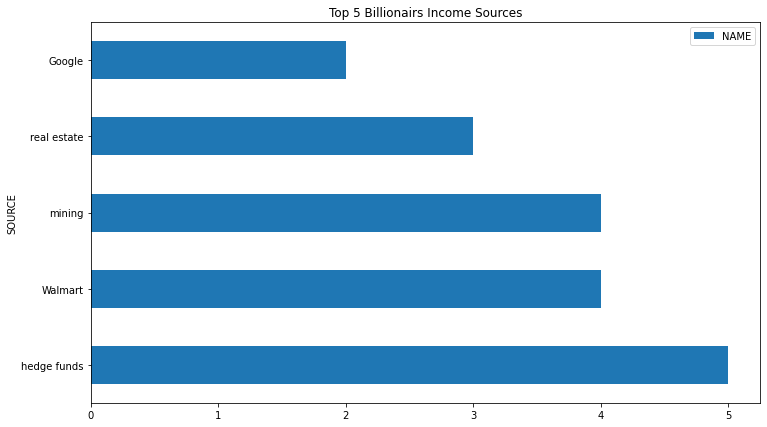

In [104]:
sources=df[['SOURCE','NAME']].groupby('SOURCE').count()
sources=sources.sort_values('NAME',ascending=False)
sources=sources.head(5)
sources.plot(kind='barh',title='Top 5 Billionairs Income Sources',figsize=(12,7))

**Is there a correlation between Age and Net worth?**

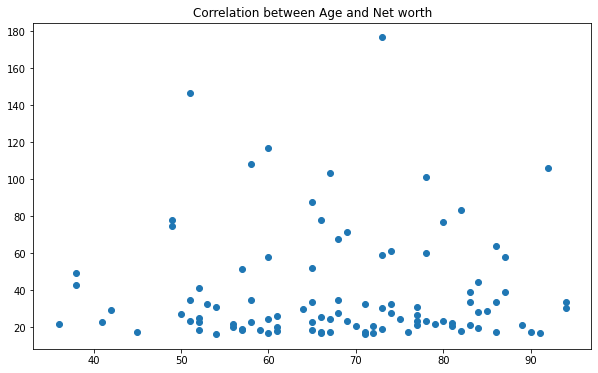

In [169]:
ages=df['AGE']
worth=df['NET WORTH']
plt.figure(figsize=(10,6))
plt.scatter(ages,worth)
plt.title('Correlation between Age and Net worth')
plt.show()

**Data encoding:**

In [177]:
df['SOURCE']=pd.factorize(df.SOURCE)[0]

In [184]:
df=df.rename(columns={'COUNTRY/TERRITORY':'Region'})

In [185]:
df['Region']=pd.factorize(df.Region)[0]

In [186]:
df.head()

,RANK,NAME,NET WORTH,AGE,SOURCE,Region
0,1.0,Bernard Arnault & family,176.6,73.0,0,0
1,2.0,Elon Musk,146.5,51.0,1,1
2,3.0,Gautam Adani,116.7,60.0,2,2
3,4.0,Jeff Bezos,108.5,58.0,3,1
4,5.0,Warren Buffett,106.3,92.0,4,1


**Data correlation:**

In [188]:
df.corr()

,RANK,NET WORTH,AGE,SOURCE,Region
RANK,1.000000,-0.803295,-0.005198,0.883783,0.296963
NET WORTH,-0.803295,1.000000,-0.007206,-0.736864,-0.340620
AGE,-0.005198,-0.007206,1.000000,-0.016589,-0.047671
SOURCE,0.883783,-0.736864,-0.016589,1.000000,0.337682
Region,0.296963,-0.340620,-0.047671,0.337682,1.000000


<AxesSubplot:>

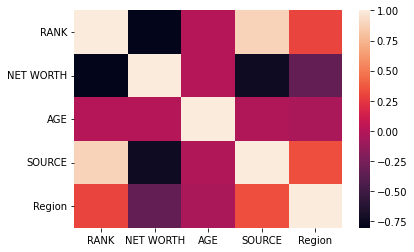

In [187]:
sns.heatmap(df.corr())

**We can see that Region and Source has a huge impact on the Net worth, a negative correlation here explain a strong relation between those features. On the other hand, age don't have an impact on the Net worth. So, don't give up! you can become a billionairs in the future LOL!**

**Net worth prediction based on Age, source and region**

**Multipe Regression Prediction:**

In [194]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

**Setting Features and terget**

In [191]:
X= df.values[:,(3,4,5)]
Y= df.values[:, 2]

**Splitting the dataset**

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 0)

In [197]:
lr= LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

**R squared score:**

In [198]:
r2=r2_score(y_test, y_pred)
r2

0.6692175097423247

**A very low score due to small data and features**

In [203]:
df2=pd.read_csv('/kaggle/input/top-50-billionaires-list/TOP 50 BILLIONAIRES LIST.csv')
df2.head(20)

,RANK,NAME,NET WORTH,AGE,SOURCE,COUNTRY/TERRITORY
0,1.0,Bernard Arnault & family,$176.6 B,73.0,LVMH,France
1,2.0,Elon Musk,$146.5 B,51.0,"Tesla, SpaceX",United States
2,3.0,Gautam Adani,$116.7 B,60.0,"infrastructure, commodities",India
3,4.0,Jeff Bezos,$108.5 B,58.0,Amazon,United States
4,5.0,Warren Buffett,$106.3 B,92.0,Berkshire Hathaway,United States
5,6.0,Bill Gates,$103.5 B,67.0,Microsoft,United States
6,7.0,Larry Ellison,$101.4 B,78.0,Oracle,United States
7,8.0,Mukesh Ambani,$87.9 B,65.0,diversified,India
8,9.0,Carlos Slim Helu & family,$83.6 B,82.0,telecom,Mexico
9,10.0,Steve Ballmer,$78.2 B,66.0,Microsoft,United States


In [204]:
df.head(20)

,RANK,NAME,NET WORTH,AGE,SOURCE,Region
0,1.0,Bernard Arnault & family,176.6,73.0,0,0
1,2.0,Elon Musk,146.5,51.0,1,1
2,3.0,Gautam Adani,116.7,60.0,2,2
3,4.0,Jeff Bezos,108.5,58.0,3,1
4,5.0,Warren Buffett,106.3,92.0,4,1
5,6.0,Bill Gates,103.5,67.0,5,1
6,7.0,Larry Ellison,101.4,78.0,6,1
7,8.0,Mukesh Ambani,87.9,65.0,7,2
8,9.0,Carlos Slim Helu & family,83.6,82.0,8,3
9,10.0,Steve Ballmer,78.2,66.0,5,1


**Prediction:**

Let's predict a random person Net worth, he is **68 years** old from **China** work for **Amazon** :

In [210]:
lr.predict([[68,3,4]])

array([70.30930819])

His Net worth will be around **$70.30 B**